In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-sports-channels-statistics/yt_sports_channels_stats.csv
/kaggle/input/new-dataset-with-sql-update/2024-03-27T08_41_2400_00_d4xf.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
youtube = pd.read_csv('/kaggle/input/new-dataset-with-sql-update/2024-03-27T08_41_2400_00_d4xf.csv')

In [4]:
youtube.head(10)

,channel_id,channel_title,start_date,video_count,view_count,subscriber_count
0,UC2t9imwIR7xlDfma3CmRKJQ,T Sports,2020-10-02 06:43:03.408024,14819,785671940,4330000
1,UCCLdGxMC4fwkaQ4AIcL7Z8w,A Sports,2016-12-22 11:40:02.000000,2615,309695531,998000
2,UCNAf1k0yIjyGu3k9BwAg3lg,Sky Sports Premier League,2015-07-06 11:11:54.000000,10715,3898162997,4830000
3,UCmEgRY1A2263UXrQhjDuU0Q,Sports Digitale,2019-09-17 08:14:58.000000,2721,122005864,446000
4,UCJUCcJUeh0Cz2xyKwkw5Q1w,beIN SPORTS,2014-02-21 08:25:40.000000,5265,1373454279,11200000
5,UC4i_9WvfPRTuRWEaWyfKuFw,TNT Sports,2013-01-02 14:09:35.000000,13478,3481324860,5280000
6,UCpdSUUHlxMjO0c5824FGcsA,S Sport,2018-02-21 09:49:16.000000,16959,463985687,1310000
7,UC9xeuekJd88ku9LDcmGdUOA,Kplus Sports,2019-08-15 04:49:59.000000,11209,2460868921,2860000
8,UCrcATWZGF_p53r38i6VK0eA,Sri Lankan Sports TV,2019-10-24 04:09:51.789207,217,469916,8260
9,UCEgdi0XIXXZ-qJOFPf4JSKw,Sports,2013-12-15 20:39:04.000000,0,0,74900000


In [5]:
youtube.tail(10)

,channel_id,channel_title,start_date,video_count,view_count,subscriber_count
548,UCSFDMU5jiMDTNMmlqltrSpA,SPORTS GAMING,2022-10-24 04:01:29.132981,35,2240,7
549,UCrR06AuusAx_wRmK4tNVuKA,Sports Pavilion,2023-09-01 19:36:35.525416,1,111,2
550,UCUMmj5OqOtHKcLaCC9W0wfQ,SHAKTHI SPORTS CLUB,2024-03-03 15:04:54.319534,1,74,7
551,UCqhHVPzd6H0ex5ah43TG6ZA,Sports club,2024-01-10 08:10:13.797960,3,26,4
552,UC1ZbLig77xKYDB2cMhDddrg,Sports Plazz,2023-07-08 11:38:50.306877,1,8,1
553,UCuw7yEPkoDxgkHVqafq-o8A,Sports 365 Live Chanel,2018-04-17 19:59:43.000000,28,360400,608
554,UCurcOeWONJE1v7cKGpniwtg,A Sports Network,2023-10-06 07:10:36.756122,47,3049,187
555,UCsCyYxxzG1oOFEaH2HoKz-g,Sports x,2023-08-04 04:37:45.228680,69,47514,88
556,UCC0PwgMUKE3eNfq4zGXiNEw,TC sports club,2023-06-28 16:47:15.289946,5,22,7
557,UCNv4Oc_Zv6UhzqI0tU8XX1Q,Sports Network,2023-09-16 05:30:00.440173,3,49,4


In [8]:
# check missing values

missing_values = youtube.isnull().sum()

In [9]:
missing_values

channel_id          0
channel_title       0
start_date          0
video_count         0
view_count          0
subscriber_count    0
dtype: int64

In [10]:
youtube.describe()

,video_count,view_count,subscriber_count
count,558.000000,5.580000e+02,5.580000e+02
mean,2363.010753,1.309949e+08,4.613304e+05
std,5075.042276,4.310238e+08,3.353877e+06
min,0.000000,0.000000e+00,0.000000e+00
25%,10.000000,1.908000e+03,2.525000e+01
50%,208.000000,6.301970e+05,3.655000e+03
75%,2165.000000,3.382086e+07,9.940000e+04
max,45199.000000,3.898163e+09,7.490000e+07


In [11]:
youtube.columns

Index(['channel_id', 'channel_title', 'start_date', 'video_count',
       'view_count', 'subscriber_count'],
      dtype='object')

In [12]:
youtube['channel_id'].value_counts()

channel_id
UCew5br5cO1ZKO7Z_F1WA8Bg    2
UCzg9GD3utZa4TCmwJUCVapw    2
UCZbNi5DqBvaOZygMl8HfjDQ    2
UCFwF2ggZy7J-HE0Bc-LCKhQ    2
UCOuEmEB8qlds-kNieo6XrYA    2
                           ..
UCEqYcU4IEXvfWt0vtGA_Cww    1
UCUDf7h4hV1g6Qrvjt4NdrNw    1
UCZTkDIurWDElInXA0Q8VCrw    1
UCDyAwFEdn0SJFKcVjmAfptA    1
UCNv4Oc_Zv6UhzqI0tU8XX1Q    1
Name: count, Length: 538, dtype: int64

In [13]:
youtube['channel_title'].value_counts()

channel_title
Sports - Topic                    5
Sports                            4
Sofascore - Sports live scores    4
Sports Tamil                      2
Xeagle Sports                     2
                                 ..
Vmax Sports                       1
Clutch Sports Media               1
Iqbal Sports                      1
TOTAL SPORTS                      1
Sports Network                    1
Name: count, Length: 525, dtype: int64

In [14]:
youtube['start_date'].value_counts()

start_date
2012-06-01 05:32:41.000000    2
2013-07-13 15:07:43.000000    2
2020-09-19 12:03:47.043053    2
2016-02-12 22:23:49.000000    2
2021-10-27 17:02:38.776423    2
                             ..
2021-02-17 19:21:02.392402    1
2017-01-14 12:10:04.000000    1
2021-06-25 10:17:32.040023    1
2020-01-28 02:04:08.413929    1
2023-09-16 05:30:00.440173    1
Name: count, Length: 538, dtype: int64

In [15]:
youtube['video_count'].value_counts()

video_count
0        33
1        18
4        15
3        15
2        14
         ..
4900      1
1389      1
10801     1
4989      1
69        1
Name: count, Length: 354, dtype: int64

In [16]:
youtube['view_count'].value_counts()

view_count
0           33
1            4
318          3
3            3
16           3
            ..
664472       1
36300055     1
69966596     1
18638213     1
49           1
Name: count, Length: 493, dtype: int64

In [17]:
youtube['subscriber_count'].value_counts()

subscriber_count
0          45
1          16
2          13
4           9
3           8
           ..
2260000     1
3080        1
2360        1
65900       1
88          1
Name: count, Length: 402, dtype: int64

Data Visualization

In [18]:
# Correlation Matrix

youtube[['video_count', 'view_count', 'subscriber_count']].corr()

,video_count,view_count,subscriber_count
video_count,1.000000,0.637878,0.157760
view_count,0.637878,1.000000,0.264835
subscriber_count,0.157760,0.264835,1.000000


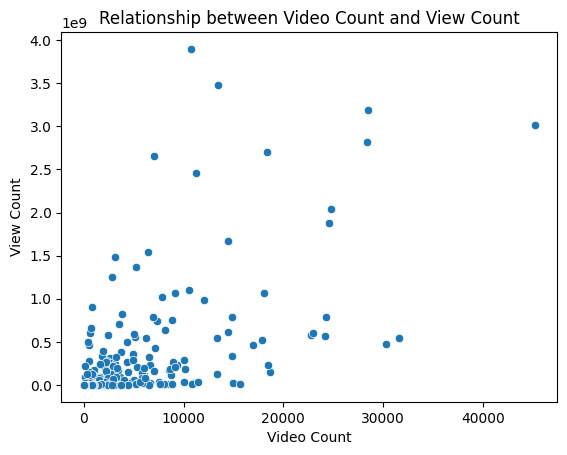

In [20]:
# Relationship between Video Count and View Count

sns.scatterplot(data=youtube, x='video_count', y='view_count')
plt.title('Relationship between Video Count and View Count')
plt.xlabel('Video Count')
plt.ylabel('View Count')
plt.show()

In [21]:
youtube.nlargest(10, 'subscriber_count')[['channel_title', 'video_count', 'view_count', 'subscriber_count']]

,channel_title,video_count,view_count,subscriber_count
9,Sports,0,0,74900000
4,beIN SPORTS,5265,1373454279,11200000
19,TNT Sports Brasil,6991,2661398591,10700000
27,LALIGA EA SPORTS,45199,3020014777,9970000
79,Rabbitholebd Sports,3090,1486347417,9200000
55,Star Sports,18330,2701624691,7210000
5,TNT Sports,13478,3481324860,5280000
125,EA SPORTS FC,821,899232758,5100000
2,Sky Sports Premier League,10715,3898162997,4830000
40,Sports Central,28347,2815015958,4720000


The top 10 sports channels with the highest subscriber counts :

1. Sports stands out with the highest subscriber count (74,900,000) but with no videos and views listed, which suggests an anomaly in the data or a special case where the channel might have removed its content or is being used in a different capacity.

2. beIN SPORTS has a substantial subscriber base (11,200,000) with 5,265 videos and over 1.37 billion views, indicating a high level of engagement per video.

3. TNT Sports Brasil has a similar strategy with 6,991 videos and over 2.66 billion views, supporting a subscriber count of 10,700,000.

4. LALIGA EA SPORTS shows a prolific content strategy with the highest video count among the top 10 (45,199) and a subscriber count of 9,970,000, achieving over 3 billion views.

5. Rabbitholebd Sports has a moderate video count (3,090) but a high view count (over 1.48 billion), suggesting effective content that resonates with its 9,200,000 subscribers.

6. Star Sports demonstrates a high content production rate with 18,330 videos, achieving over 2.7 billion views and a subscriber count of 7,210,000.

7. TNT Sports has a strong presence with 13,478 videos and the highest view count among the top 10 (over 3.48 billion), supporting its 5,280,000 subscribers.

8. EA SPORTS FC shows a focused content strategy with 821 videos and nearly 900 million views, indicating high engagement that contributes to its 5,100,000 subscribers.

9. Sky Sports Premier League has a balanced approach with 10,715 videos and the highest view count among the top 10 (over 3.89 billion), reflecting its strong subscriber base of 4,830,000.

10. Sports Central has the second-highest video count (28,347) and over 2.81 billion views, supporting a subscriber count of 4,720,000.

The time series analysis shows the annual trends in video count, view count, and subscriber count for sports channels on YouTube

In [23]:
data_annual_means = pd.read_csv('/kaggle/input/timeseries-file-for-analysis/2024-03-27T09_04_3800_00_8wya.csv')

In [24]:
data_annual_means.head()

,start_date,video_count,view_count,subscriber_count
0,2005-12-31,553.000000,2.766328e+08,1.090000e+06
1,2006-12-31,12487.000000,1.323920e+09,3.749167e+06
2,2007-12-31,7915.250000,4.079588e+08,6.803250e+05
3,2008-12-31,1510.666667,2.562001e+07,1.031667e+05
4,2009-12-31,8300.666667,6.698760e+08,2.309537e+06


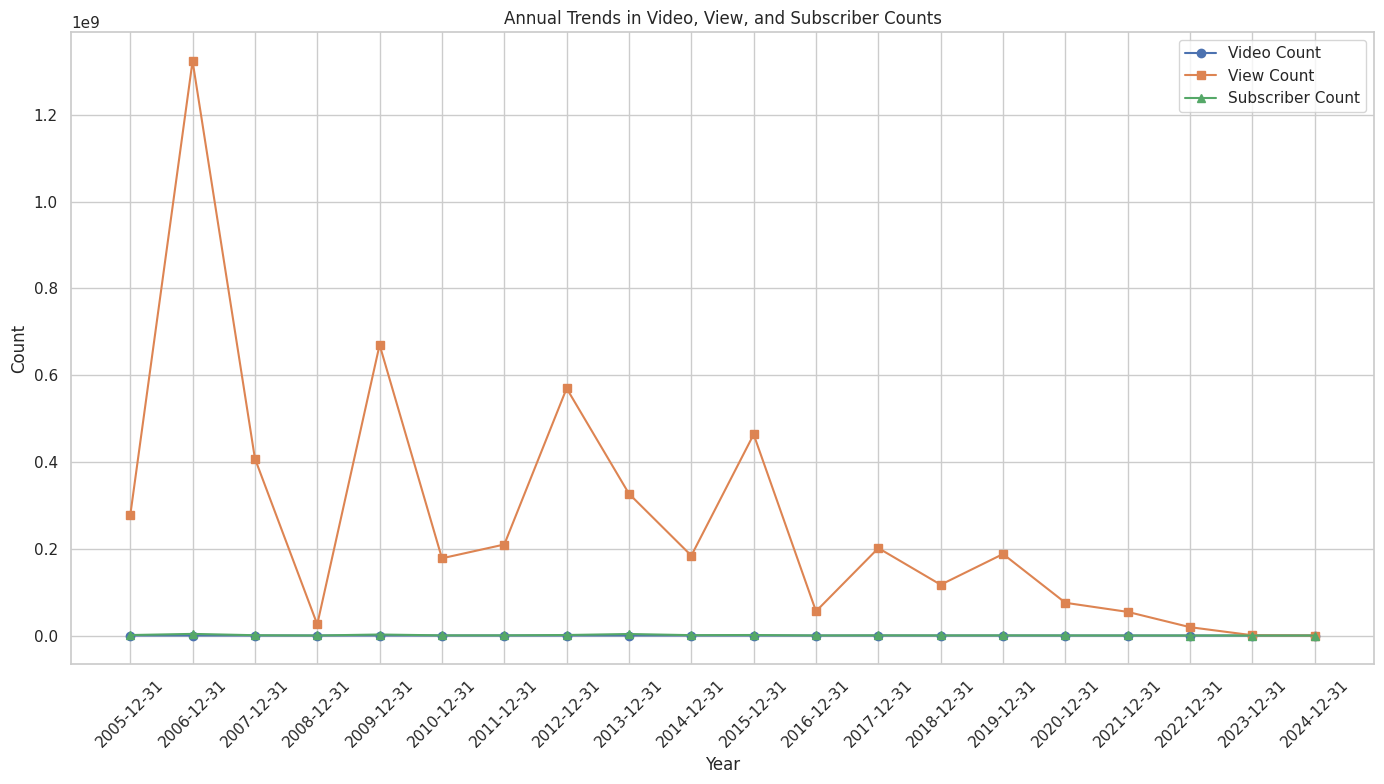

In [25]:
# Annual Trends in Video, View, and Subscriber Counts

sns.set(style='whitegrid')

plt.figure(figsize=(14, 8))

# Plotting video count trend
plt.plot(data_annual_means['start_date'], data_annual_means['video_count'], label='Video Count', marker='o')

# Plotting view count trend
plt.plot(data_annual_means['start_date'], data_annual_means['view_count'], label='View Count', marker='s')

# Plotting subscriber count trend
plt.plot(data_annual_means['start_date'], data_annual_means['subscriber_count'], label='Subscriber Count', marker='^')

plt.title('Annual Trends in Video, View, and Subscriber Counts')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

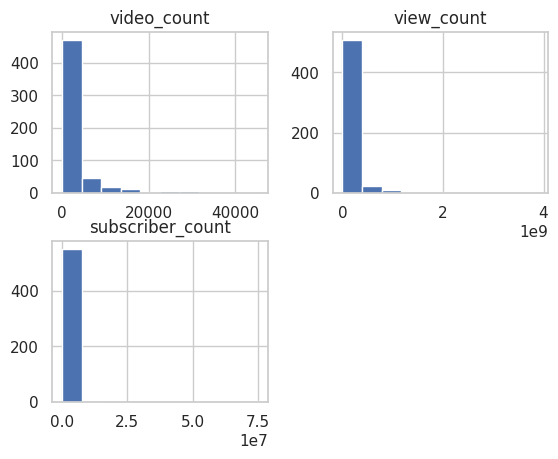

In [26]:
# histogram

youtube.hist()
plt.show()